## Лабораторная работа №2

### Пункт 1: Запуск Graph500

 Для запуска Graph500 использовал реализацию Octave/Matlab.
 Характеристики машины:
* ОС: Oracle Linux Server 6.7 64-bit
* RAM: 10Gb
* CPUs: 4-Core, Intel Core I5-4570 CPU 3.20GHz
* Octave: version 3.4.3

#### Полученные результаты:

SCALE: 14
edgefactor: 14
NBFS: 64
construction_time: 3.57880592346191406e-02
min_time: 2.96732902526855469e-01
firstquartile_time: 2.97843813896179199e-01
median_time: 2.99216508865356445e-01
thirdquartile_time: 3.02743256092071533e-01
max_time: 3.26714038848876953e-01
mean_time: 3.01395107060670853e-01
stddev_time: 5.83110734311279629e-03
min_nedge: 1.67813000000000000e+05
firstquartile_nedge: 1.67813000000000000e+05
median_nedge: 1.67813000000000000e+05
thirdquartile_nedge: 1.67813000000000000e+05
max_nedge: 1.67813000000000000e+05
mean_nedge: 1.67813000000000000e+05
stddev_nedge: 0.00000000000000000e+00
min_TEPS: 5.13638779010725848e+05
firstquartile_TEPS: 5.54308712031384581e+05
median_TEPS: 5.60841380875831470e+05
thirdquartile_TEPS: 5.63426175613770378e+05
max_TEPS: 5.65535532362516737e+05
harmonic_mean_TEPS: 5.56787406526208739e+05
harmonic_stddev_TEPS: 1.35716911474139306e+03

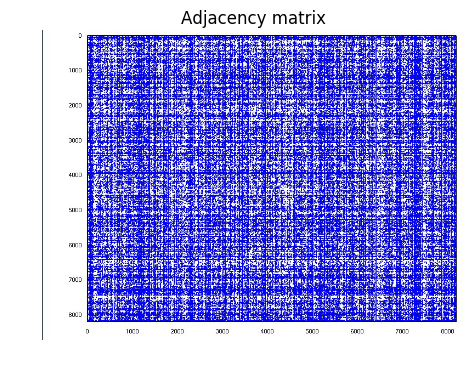

Как видно из результата, производительность колебалась от 0,51 MTEPS до 0,56 MTEPS

### Пункт 2: Определение параметров графа Кронекера

Результаты генерации 1000 графов хранятся в файле graphs.txt

#### Полученная гистограмма #{n,d}

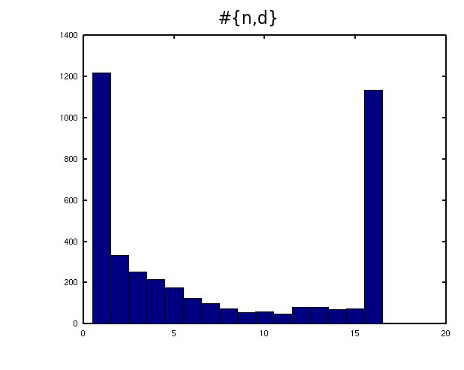

Как видно из графика степенной закон распределения степеней вершин (≈ c / d^2.3) в большей степени соблюдается. Однако имеет место выброс при d~16.

### Пункт 3: Построение сучайного веб-графа в модели Боллобаша-Риордана

Написал класс BollobashRiordan на языке Java, с помощью которого сгенерировал неориентированный граф: n = 4000, m = 16

In [ ]:
import java.io.*;
import java.util.*;

/**
 * @author Vadzim_Kanavod
 */
public class BollobashRiordan {
  public static void main(String[] args) throws IOException {
    int n = 4000;
    int m = 16;

    int[][] a = bollobashStepOne(n);
    int[][] b = bollobashStepTwo(a, n, m);

    writeMatrixToFile(a, n);
    writeMatrixToFile(b, n);
  }

  private static int[][] bollobashStepOne(int n) {
    int[][] a = new int[2][n];
    int[] degs = new int[n];

    a[0][0] = 1;
    a[1][0] = 1;
    degs[0] = 2;

    for (int i = 1; i < n; i++) {
      a[0][i] = i+1;
      a[1][i] = 0;
      degs[i] = 1;

      int x = getVertexConnectTo(probabilities(degs, i));

      degs[x-1]+=1;
      a[1][i] = x;
    }
    return a;
  }

  private static int[][] bollobashStepTwo(int[][] a, int n, int m) {
    int[][] b = new int[2][n];
    for (int i = 0; i < a[0].length; i++) {
      b[0][i] = recalculateVertex(a[0][i], m);
      b[1][i] = recalculateVertex(a[1][i], m);
    }
    return b;
  }

  private static int recalculateVertex(int a, int m) {
    return a/m + (a%m > 0 ? 1 : 0);
  }

  private static double[] probabilities(int[] degs, int n) {
    double[] a = new double[n+1];
    double divider = 2*(n+1)-1;
    for (int i = 0; i < n+1; i++) {
      a[i] = degs[i]/divider;
    }
    return a;
  }

  private static int getVertexConnectTo(double[] probabilities) {
    Random r = new Random();
    double rand = r.nextDouble();
    int inc = 0;
    double cumsum = 0;
    for (int i = 0; i < probabilities.length; i++) {
      cumsum += probabilities[i];
      if (rand >= cumsum) {
        inc++;
      } else {
        break;
      }
    }
    return ++inc;
  }

  private static void writeMatrixToFile(int[][] a, int n) throws IOException {
    File f = new File("output.txt");
    BufferedWriter writer = new BufferedWriter(new FileWriter(f, true));

    int count = 0;
    for (int i = 0; i < 2; i++) {
      for (int j = 0; j < n; j++) {
        writer.write(a[i][j] + " ");
        count++;
      }
      writer.newLine();
    }
    writer.newLine();
    System.out.println(count/2);
    writer.close();
  }
}

#### Матрица смежности

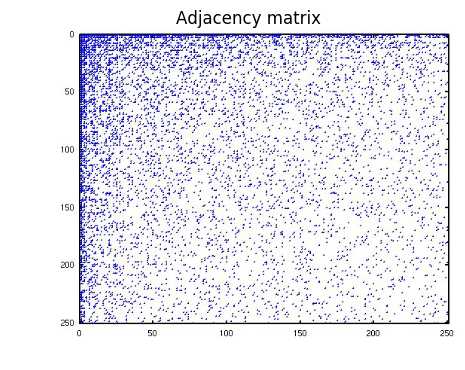

Как видно из графиков, первые 50 точек (сайтов) являются "хабами". Все остальные либо связаны между собой слабо, либо не связаны вовсе. Диаметр получившегося графа равен 3.

#### Гистограмма

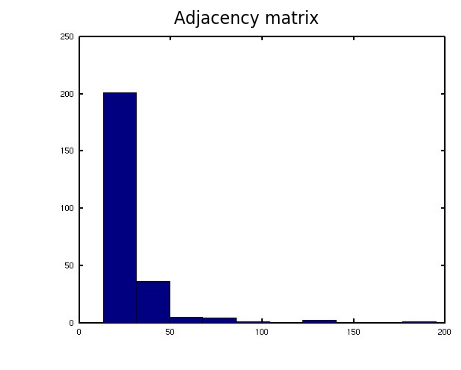